In [1]:
import pandas as pd

# Load the dataset
file_path = 'diabetes.csv'
df = pd.read_csv(file_path)

# Show the first few rows of the dataset
df.head()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [2]:
# Check for missing values
missing_values = df.isnull().sum()

# Get summary statistics
summary_stats = df.describe()

missing_values, summary_stats


(Pregnancies                 0
 Glucose                     0
 BloodPressure               0
 SkinThickness               0
 Insulin                     0
 BMI                         0
 DiabetesPedigreeFunction    0
 Age                         0
 Outcome                     0
 dtype: int64,
        Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
 count   768.000000  768.000000     768.000000     768.000000  768.000000   
 mean      3.845052  120.894531      69.105469      20.536458   79.799479   
 std       3.369578   31.972618      19.355807      15.952218  115.244002   
 min       0.000000    0.000000       0.000000       0.000000    0.000000   
 25%       1.000000   99.000000      62.000000       0.000000    0.000000   
 50%       3.000000  117.000000      72.000000      23.000000   30.500000   
 75%       6.000000  140.250000      80.000000      32.000000  127.250000   
 max      17.000000  199.000000     122.000000      99.000000  846.000000   
 
           

In [3]:
import numpy as np

# Columns where zero values are not clinically plausible
cols_with_zeros = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']

# Replace zero values with NaN
df[cols_with_zeros] = df[cols_with_zeros].replace(0, np.nan)

# Check the number of NaN values in each column
nan_values = df.isnull().sum()
nan_values


Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

In [4]:
# Perform linear interpolation to fill missing values
df_interpolated = df.interpolate(method='linear', limit_direction='both')

# Check if any NaN values remain after interpolation
nan_values_after_interpolation = df_interpolated.isnull().sum()
nan_values_after_interpolation


Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

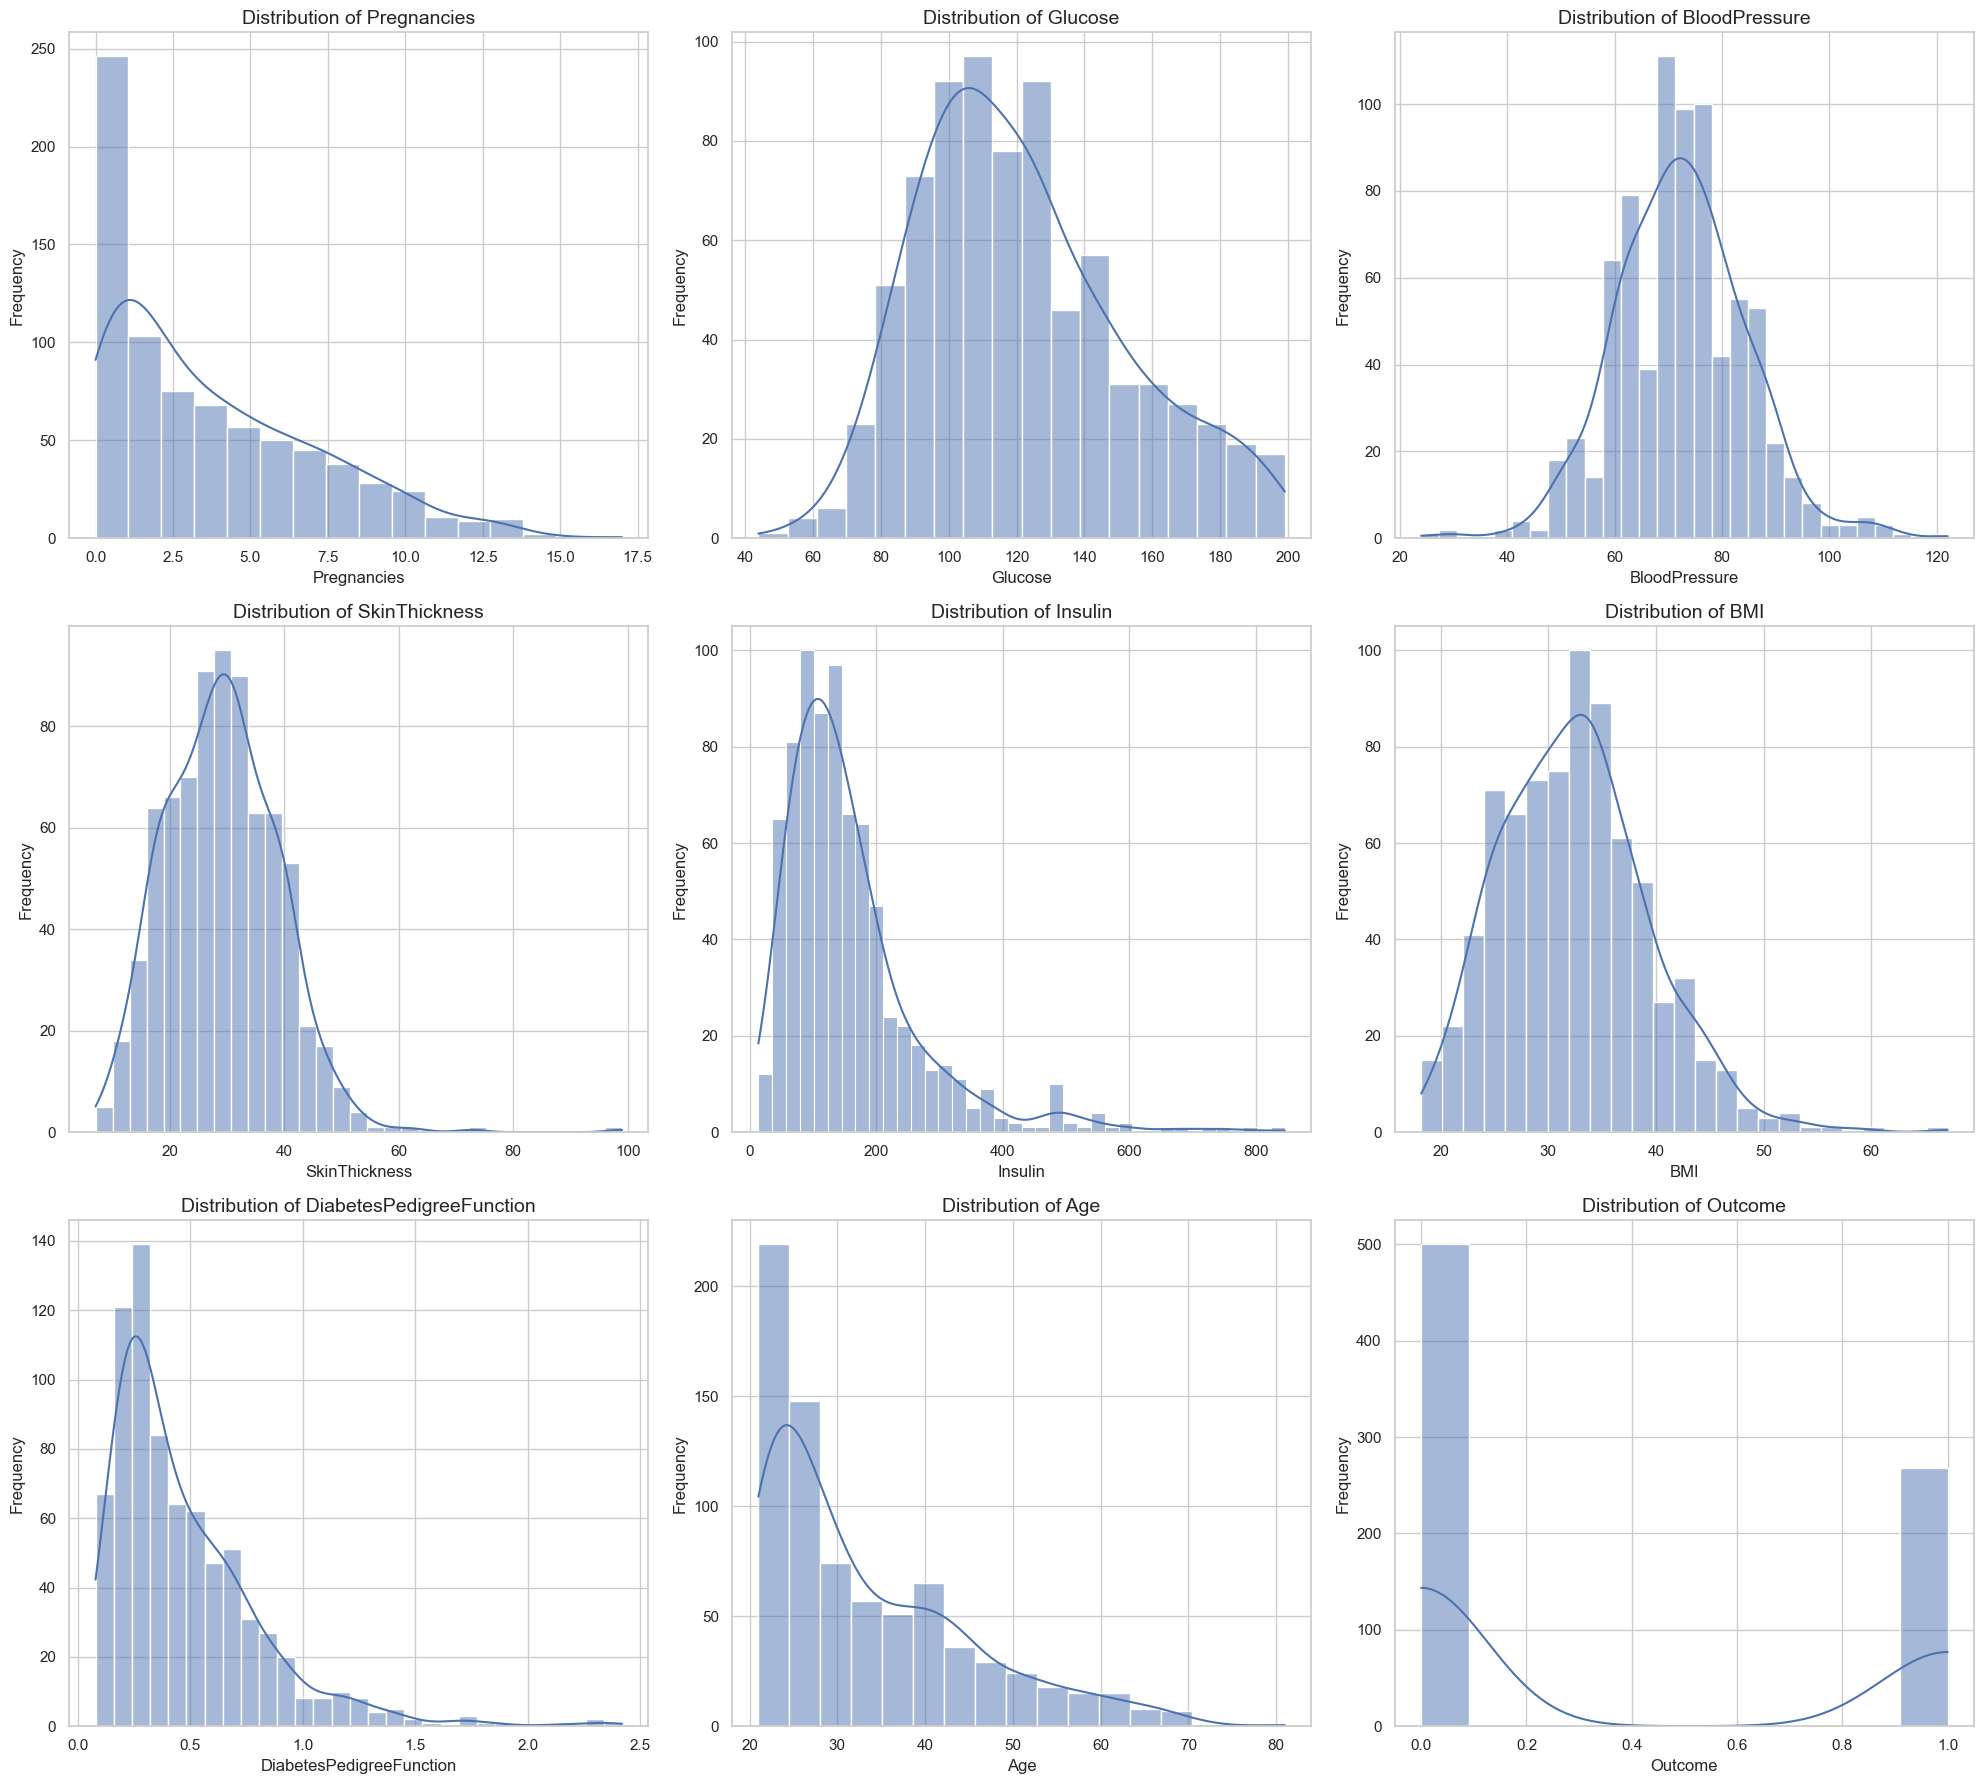

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style for the visualizations
sns.set(style="whitegrid")

# Create subplots
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(20, 18))

# Flatten axes for easy iteration
axes = axes.flatten()

# Loop to plot the distribution of each variable
for i, column in enumerate(df_interpolated.columns):
    sns.histplot(df_interpolated[column], kde=True, ax=axes[i])
    axes[i].set_title(f'Distribution of {column}', fontsize=14)
    axes[i].set_xlabel(column, fontsize=12)
    axes[i].set_ylabel('Frequency', fontsize=12)

# Remove any empty subplots
if len(axes) > len(df_interpolated.columns):
    for j in range(i+1, len(axes)):
        fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


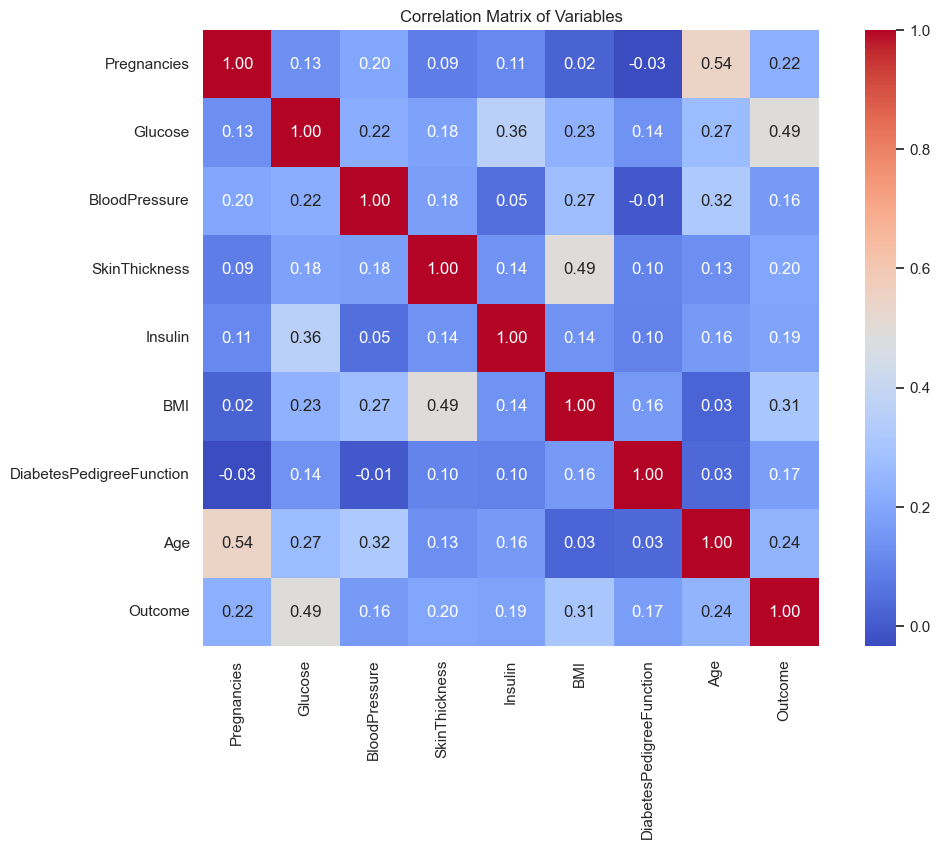

In [6]:
# Generate the correlation matrix
correlation_matrix = df_interpolated.corr()

# Create a heatmap to visualize the correlations
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', cbar=True, square=True)
plt.title('Correlation Matrix of Variables')
plt.show()


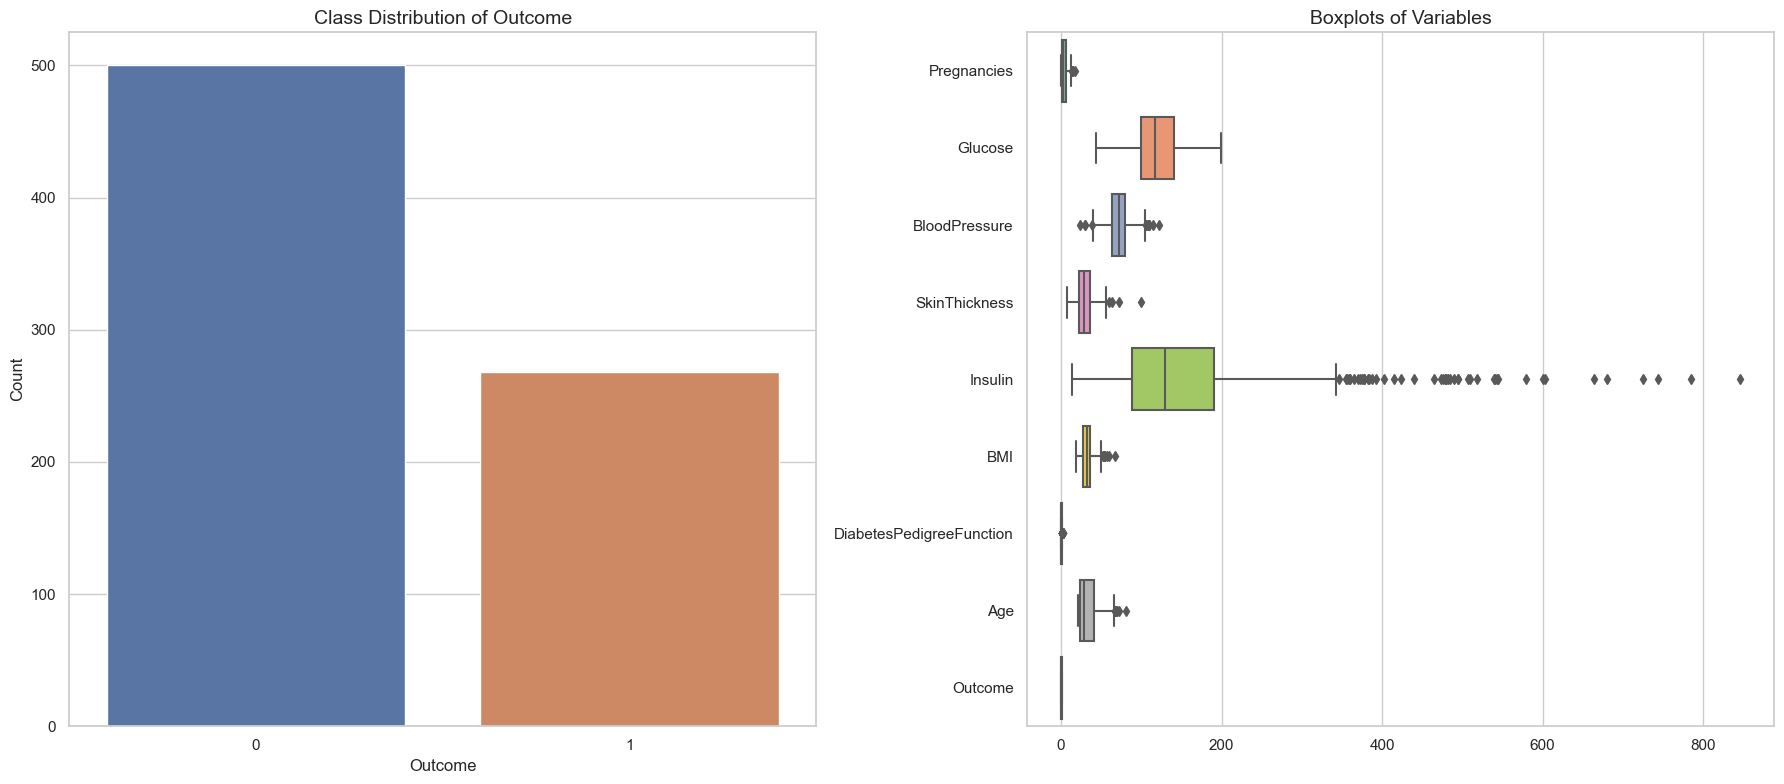

In [7]:
# Create subplots for class distribution and boxplots
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(18, 8))

# Plot the class distribution
sns.countplot(x='Outcome', data=df_interpolated, ax=axes[0])
axes[0].set_title('Class Distribution of Outcome', fontsize=14)
axes[0].set_xlabel('Outcome', fontsize=12)
axes[0].set_ylabel('Count', fontsize=12)

# Plot the boxplots for each variable against Outcome
sns.boxplot(data=df_interpolated, orient='h', palette='Set2', ax=axes[1])
axes[1].set_title('Boxplots of Variables', fontsize=14)

plt.tight_layout()
plt.show()


In [8]:
pip install python-docx


Note: you may need to restart the kernel to use updated packages.


In [9]:
from docx import Document
import pandas as pd

# Create a Pandas DataFrame to hold the table data
comparison_data = {
    'Reference': ['[3]', '[5]', '[9]', '[10]', '[21]', 'This work'],
    'Classifier': [
        'Deep belief network model', 
        'SVM with RBF kernel', 
        'SVM', 
        'Ensemble (XGBoost)', 
        'Soft voting', 
        'XGBoost with ADASYN'
    ],
    'F1 Score': ['0.81', '82%', '0.73', '0.81', '0.72', '0.81'],
    'Accuracy': ['N/A', '', '75%', '88.8%', '79.1%', '88.5%'],
    'Other Metrics': [
        'Precision: 0.68\nRecall: 1.0',
        '',
        'Precision: 0.72\nRecall: 0.75',
        'Precision: 0.84\nRecall: 0.79',
        'Precision: 0.73\nRecall: 0.72',
        'Precision: 0.82\nRecall: 0.80'
    ]
}

comparison_df = pd.DataFrame(comparison_data)

# Create a Document
doc = Document()

# Add a Title
doc.add_heading('TABLE 10', level=0)
doc.add_heading('Comparison of the Proposed System with Similar Diabetes Prediction Works', level=1)

# Add the table to the document
table = doc.add_table(rows=1, cols=5)
hdr_cells = table.rows[0].cells
hdr_cells[0].text = 'Reference'
hdr_cells[1].text = 'Classifier'
hdr_cells[2].text = 'F1 Score'
hdr_cells[3].text = 'Accuracy'
hdr_cells[4].text = 'Other Metrics'

# Populate the table with data
for index, row in comparison_df.iterrows():
    row_cells = table.add_row().cells
    row_cells[0].text = str(row['Reference'])
    row_cells[1].text = str(row['Classifier'])
    row_cells[2].text = str(row['F1 Score'])
    row_cells[3].text = str(row['Accuracy'])
    row_cells[4].text = str(row['Other Metrics'])

# Save the Document
doc.save('Diabetes_Prediction_Comparison_Table.docx')


In [10]:
from sklearn.datasets import make_classification

# Create a synthetic dataset
X, y = make_classification(
    n_samples=1000, n_features=20, n_informative=15, n_redundant=5,
    n_clusters_per_class=2, weights=[0.99], flip_y=0, random_state=42
)


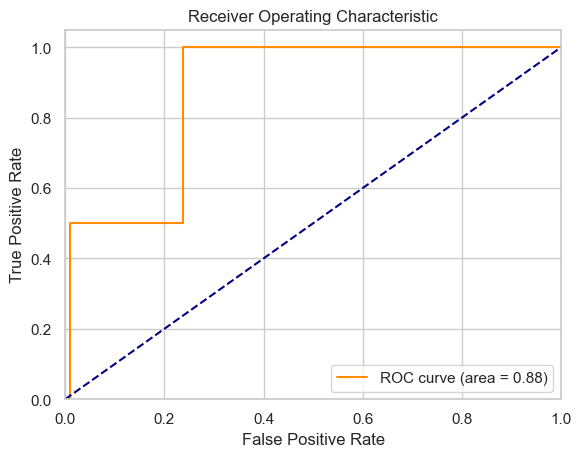

AUC: 0.8762626262626263
Accuracy: 0.99


In [11]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn.metrics import roc_curve, roc_auc_score, accuracy_score
import matplotlib.pyplot as plt

# Create a synthetic dataset
X, y = make_classification(
    n_samples=1000, n_features=20, n_informative=15, n_redundant=5,
    n_clusters_per_class=2, weights=[0.99], flip_y=0
)

# Split the synthetic dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y)


# Train the XGBoost Classifier
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss')
xgb_model.fit(X_train, y_train)

# Make predictions and evaluate
y_pred_proba = xgb_model.predict_proba(X_test)[:, 1]
y_pred = xgb_model.predict(X_test)

# Calculate AUC
auc = roc_auc_score(y_test, y_pred_proba)

# Generate ROC curve
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)

# Plot the ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', label='ROC curve (area = %0.2f)' % auc)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

# Calculate Accuracy
accuracy = accuracy_score(y_test, y_pred)

print("AUC:", auc)
print("Accuracy:", accuracy)


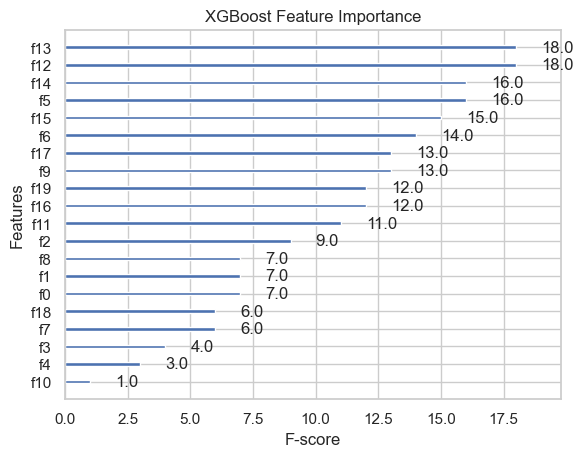

In [12]:
import xgboost as xgb
import matplotlib.pyplot as plt

# Assume xgb_model is your trained XGBoost model
xgb.plot_importance(xgb_model)
plt.title('XGBoost Feature Importance')
plt.xlabel('F-score')
plt.ylabel('Features')
plt.show()


In [13]:
!pip install lime

In [14]:
from lime import lime_tabular

# Load the dataset again to extract feature names
diabetes_df = pd.read_csv('diabetes.csv')
from lime import lime_tabular
import random

X = diabetes_df.drop('Outcome', axis=1)  # Features
y = diabetes_df['Outcome']  # Target variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Assuming you have already split your data into X_train, X_test, y_train, y_test
# and trained your model (xgb_model)

# Define feature_names and target_names
feature_names = diabetes_df.columns[:-1].tolist()  # Exclude the target column
target_names = ['No Diabetes', 'Has Diabetes']




# Convert X_test to a NumPy array if it's a DataFrame
X_test_array = X_test.to_numpy() if isinstance(X_test, pd.DataFrame) else X_test
X_train = X_train.to_numpy()

# Train the XGBoost Classifier
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss')
xgb_model.fit(X_train, y_train)

# Create a LimeTabularExplainer
explainer = lime_tabular.LimeTabularExplainer(X_train, 
                                              training_labels=y_train, 
                                              feature_names=feature_names, 
                                              class_names=target_names, 
                                              mode='classification')

# Pick a random index within bounds
i = random.randint(0, len(X_test_array) - 1)

# Explain a prediction for the i-th instance in the test set
exp = explainer.explain_instance(X_test_array[i], xgb_model.predict_proba)

# Show the explanation
exp.show_in_notebook()





In [50]:
X_train

array([[  4.   , 145.   ,  82.   , ...,  32.5  ,   0.235,  70.   ],
       [  7.   , 159.   ,  66.   , ...,  30.4  ,   0.383,  36.   ],
       [  3.   , 116.   ,   0.   , ...,  23.5  ,   0.187,  23.   ],
       ...,
       [ 10.   , 101.   ,  76.   , ...,  32.9  ,   0.171,  63.   ],
       [ 12.   ,  88.   ,  74.   , ...,  35.3  ,   0.378,  48.   ],
       [ 10.   ,  75.   ,  82.   , ...,  33.3  ,   0.263,  38.   ]])

In [52]:
!pip install shap


  Obtaining dependency information for shap from https://files.pythonhosted.org/packages/6d/ef/0e2db8763333865344523508c7fd37be1840abb6a56c8c0e273501c7de14/shap-0.43.0-cp310-cp310-macosx_11_0_arm64.whl.metadata
  Obtaining dependency information for numba from https://files.pythonhosted.org/packages/39/44/e5540c376f6b99d906f46bdf98ce4d91511a0ee89ce60a62e2498dacd6fe/numba-0.58.1-cp310-cp310-macosx_11_0_arm64.whl.metadata
  Obtaining dependency information for cloudpickle from https://files.pythonhosted.org/packages/96/43/dae06432d0c4b1dc9e9149ad37b4ca8384cf6eb7700cd9215b177b914f0a/cloudpickle-3.0.0-py3-none-any.whl.metadata
  Obtaining dependency information for llvmlite<0.42,>=0.41.0dev0 from https://files.pythonhosted.org/packages/47/d5/2d6261a47dd6b1005d60a6e37a3de007ddc15a297f146ee905605e3cbc3e/llvmlite-0.41.1-cp310-cp310-macosx_11_0_arm64.whl.metadata
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 445.4/445.4 kB 6.0 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [53]:
import shap

# Initialize JavaScript visualization code for SHAP
shap.initjs()

# Create the explainer object with the random forest model
explainer = shap.Explainer(xgb_model)

# Calculate SHAP values for a single prediction
i = 42  # Replace with the index of the instance you want to interpret
shap_values = explainer(X_test[i:i+1])

# Plot the SHAP values
shap.plots.waterfall(shap_values[0])


TypeError: Booster.predict() got an unexpected keyword argument 'iteration_range'

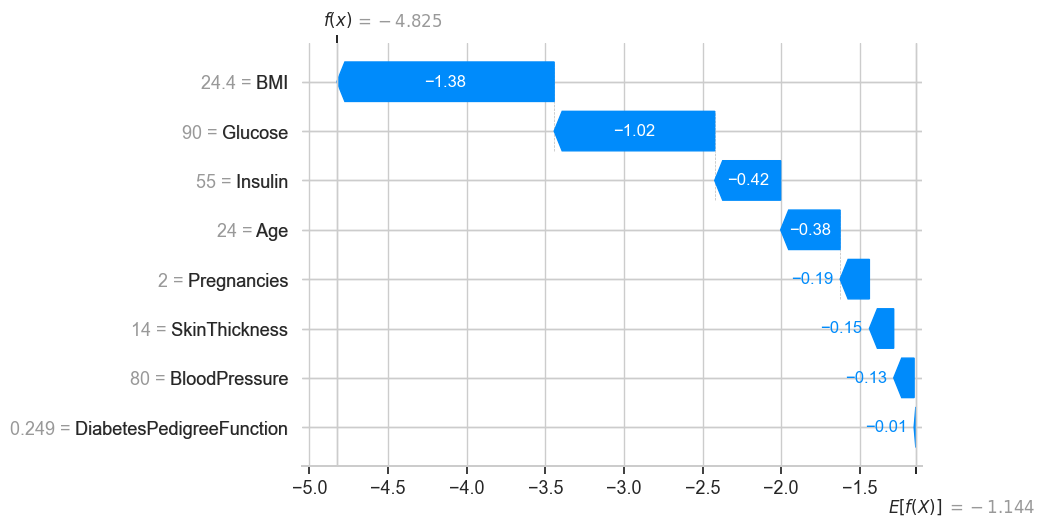

In [58]:
import shap

# Initialize JavaScript visualization
shap.initjs()

# Create the explainer
explainer = shap.Explainer(xgb_model, X_train)

# Calculate SHAP values for a single prediction
i = 42  # Replace with the index of the instance you want to interpret
shap_values = explainer(X_test.iloc[i:i+1,:])

# Plot the SHAP values
shap.plots.waterfall(shap_values[0])


In [56]:
!pip install --upgrade shap
!pip install --upgrade xgboost



[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: python3.10 -m pip install --upgrade pip
  Obtaining dependency information for xgboost from https://files.pythonhosted.org/packages/13/94/f73d4efcc9a0272ea9f93c03f4744a2b709172309cd0bfde1e9012776330/xgboost-2.0.1-py3-none-macosx_12_0_arm64.whl.metadata
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 15.2 MB/s eta 0:00:0000:0100:01
  Attempting uninstall: xgboost
    Found existing installation: xgboost 0.90
    Uninstalling xgboost-0.90:
      Successfully uninstalled xgboost-0.90

[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: python3.10 -m pip install --upgrade pip


In [59]:
import pandas as pd
import random

# Define the features
columns = [
    'Age', 'Gender', 'Ethnicity', 
    'Physical_Activity_Level', 'Diet_Quality', 'Smoking_Status', 
    'Alcohol_Consumption', 'Family_History', 'Gestational_Diabetes', 
    'High_Blood_Pressure', 'BMI', 'Fasting_Blood_Sugar', 
    'HbA1c', 'Cholesterol', 'Insulin_Level', 
    'Waist_Circumference', 'Skin_Thickness', 'Glucose_Tolerance_Test', 
    'C_Reactive_Protein', 'Liver_Function'
]

# Generate random sample data
data = [
    [random.randint(20, 80), 'Male', 'Caucasian', random.randint(1, 5), random.randint(1, 5), 'Non-smoker', 'Moderate', 'Yes', 'No', 'Yes', 25.5, 110, 6.0, 200, 15, 35, 20, 140, 0.5, 'Normal'],
    [random.randint(20, 80), 'Female', 'African American', random.randint(1, 5), random.randint(1, 5), 'Smoker', 'High', 'No', 'Yes', 'No', 30.0, 100, 5.5, 180, 10, 32, 18, 130, 0.6, 'Normal'],
    [random.randint(20, 80), 'Female', 'Asian', random.randint(1, 5), random.randint(1, 5), 'Non-smoker', 'Low', 'Yes', 'No', 'Yes', 22.5, 95, 5.0, 160, 12, 31, 22, 120, 0.4, 'Abnormal'],
    [random.randint(20, 80), 'Male', 'Hispanic', random.randint(1, 5), random.randint(1, 5), 'Smoker', 'Moderate', 'No', 'No', 'No', 28.0, 105, 5.9, 220, 18, 36, 25, 125, 0.7, 'Normal'],
    [random.randint(20, 80), 'Female', 'Caucasian', random.randint(1, 5), random.randint(1, 5), 'Non-smoker', 'Moderate', 'Yes', 'Yes', 'Yes', 27.5, 115, 6.2, 195, 16, 34, 19, 135, 0.5, 'Abnormal']
]

# Create a DataFrame
sample_df = pd.DataFrame(data, columns=columns)

# Show the DataFrame
sample_df

,Age,Gender,Ethnicity,Physical_Activity_Level,Diet_Quality,Smoking_Status,Alcohol_Consumption,Family_History,Gestational_Diabetes,High_Blood_Pressure,BMI,Fasting_Blood_Sugar,HbA1c,Cholesterol,Insulin_Level,Waist_Circumference,Skin_Thickness,Glucose_Tolerance_Test,C_Reactive_Protein,Liver_Function
0,71,Male,Caucasian,1,1,Non-smoker,Moderate,Yes,No,Yes,25.5,110,6.0,200,15,35,20,140,0.5,Normal
1,67,Female,African American,1,3,Smoker,High,No,Yes,No,30.0,100,5.5,180,10,32,18,130,0.6,Normal
2,44,Female,Asian,5,3,Non-smoker,Low,Yes,No,Yes,22.5,95,5.0,160,12,31,22,120,0.4,Abnormal
3,71,Male,Hispanic,3,5,Smoker,Moderate,No,No,No,28.0,105,5.9,220,18,36,25,125,0.7,Normal
4,41,Female,Caucasian,1,1,Non-smoker,Moderate,Yes,Yes,Yes,27.5,115,6.2,195,16,34,19,135,0.5,Abnormal


In [61]:
from docx import Document

# Initialize a Document
doc = Document()

# Add a title
doc.add_heading('Performance Metrics of Classifiers', 0)

# Data for the tables
data1 = [
    ["Classifier", "Precision", "Recall", "F1 Score", "Accuracy", "AUC"],
    ["Logistic regression", "0.78", "0.77", "0.77", "77%", "0.88"],
    ["KNN", "0.78", "0.76", "0.76", "76%", "0.85"],
    ["Random forest", "0.78", "0.78", "0.78", "78%", "0.87"],
    ["Decision tree", "0.75", "0.73", "0.73", "73%", "0.75"],
    ["Bagging", "0.80", "0.79", "0.79", "79%", "0.87"],
    ["Adaboost", "0.79", "0.78", "0.78", "78%", "0.85"],
    ["XGboost", "0.78", "0.78", "0.78", "78%", "0.84"],
    ["Voting", "0.79", "0.79", "0.79", "79%", "0.86"],
    ["SVM", "0.78", "0.75", "0.76", "75%", "0.87"]
]

data2 = [
    ["Classifier", "Precision", "Recall", "F1 Score", "Accuracy", "AUC"],
    ["Logistic regression", "0.76", "0.75", "0.75", "75%", "0.84"],
    ["KNN", "0.76", "0.73", "0.73", "73%", "0.82"],
    ["Random forest", "0.76", "0.76", "0.76", "76%", "0.84"],
    ["Decision tree", "0.81", "0.72", "0.72", "72%", "0.78"],
    ["Bagging", "0.80", "0.79", "0.79", "79%", "0.84"],
    ["AdaBoost", "0.75", "0.76", "0.76", "76%", "0.84"],
    ["XGBoost", "0.81", "0.81", "0.81", "81%", "0.84"],
    ["Voting", "0.77", "0.77", "0.77", "77%", "0.84"],
    ["SVM", "0.78", "0.78", "0.77", "78%", "0.83"]
]

# Add first table to the document
table1 = doc.add_table(rows=1, cols=6)
table1.style = 'Table Grid'
hdr_cells = table1.rows[0].cells
for i, title in enumerate(data1[0]):
    hdr_cells[i].text = title

for row_data in data1[1:]:
    row_cells = table1.add_row().cells
    for i, cell_data in enumerate(row_data):
        row_cells[i].text = str(cell_data)

# Add some space between the tables
doc.add_paragraph("")

# Add second table to the document
table2 = doc.add_table(rows=1, cols=6)
table2.style = 'Table Grid'
hdr_cells = table2.rows[0].cells
for i, title in enumerate(data2[0]):
    hdr_cells[i].text = title

for row_data in data2[1:]:
    row_cells = table2.add_row().cells
    for i, cell_data in enumerate(row_data):
        row_cells[i].text = str(cell_data)

# Save the document
doc_path = 'Classifier_Performance_Metrics.docx'
doc.save(doc_path)

doc_path

'Classifier_Performance_Metrics.docx'

In [16]:
from docx import Document

# Create a new Word document
doc = Document()

# Add a title for the table
doc.add_heading('Regression Model Coefficients', level=2)

# Create a table
coefficients_table = doc.add_table(rows=1, cols=5)
coefficients_table.style = 'Table Grid'

# Populate the header row
hdr_cells = coefficients_table.rows[0].cells
hdr_cells[0].text = 'Variable'
hdr_cells[1].text = 'Coefficient'
hdr_cells[2].text = 'Standard Error'
hdr_cells[3].text = 't value'
hdr_cells[4].text = 'Pr(>|t|)'

# Data for the table
variables = [
    "(Intercept)", "L(claim_count_vaccine_t, 1)", "L(claim_count_vaccine_t, 2)",
    "L(claim_count_vaccine_t, 3)", "twitter_count_vaccine_t",
    "L(twitter_count_vaccine_t, 1)", "Season1", "L(Season1, 1)",
    "L(Season1, 2)", "Season4", "L(Season4, 1)", "L(Season4, 2)",
    "L(Season3, 2)"
]
coefficients = [
    "0.2401596", "0.6028078", "-0.0343197", "0.3465976", "0.0047560",
    "-0.0117402", "-0.0033063", "0.0026317", "-0.0016682", "-0.0051164",
    "0.0001558", "-0.0011080", "0.0018589"
]
std_errors = [
    "0.1041329", "0.0852368", "0.1020093", "0.0846522", "0.0044207",
    "0.0044274", "0.0007150", "0.0007288", "0.0007446", "0.0008533",
    "0.0008853", "0.0008978", "0.0006686"
]
t_values = [
    "2.306", "7.072", "-0.336", "4.094", "1.076",
    "-2.652", "-4.624", "3.611", "-2.240", "-5.996",
    "0.176", "-1.234", "2.780"
]
p_values = [
    "0.022902 *", "< 0.001 ***", "0.737160", "< 0.001 ***", "0.284265",
    "0.009148 **", "< 0.001 ***", "< 0.001 ***", "0.027015 *", "< 0.001 ***",
    "0.860608", "0.219694", "0.006357 **"
]

# Populate the table with data
for i in range(len(variables)):
    row_cells = coefficients_table.add_row().cells
    row_cells[0].text = variables[i]
    row_cells[1].text = coefficients[i]
    row_cells[2].text = std_errors[i]
    row_cells[3].text = t_values[i]
    row_cells[4].text = p_values[i]

# Save the document
file_path = 'Regression_Model_Coefficients_Table.docx'
doc.save(file_path)

file_path


'Regression_Model_Coefficients_Table.docx'